In [1]:
import sys
import numpy as np
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler
import envs.data_utils as du

# Non-stationary data generation

In [2]:
def create_datafile_name(model, component_id, transformation, distinguishable):
    component_identifier = '_id' if component_id else ''
    dist = '_dist' if distinguishable else ''
    return 'data/prepared_data/' + model + component_identifier + '_' + transformation + dist + '.csv'

def create_non_stationary_data(model, dist):
    trans = ['raw', 'cube', 'sqt', 'log10', 'ln', 'log2']
    for t in trans:
        dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation=t, distinguishable=dist)
        non_stationary_data_ARCH = du.create_non_stationary_data(model, dh.data)
        non_stationary_data_ARCH.to_csv(create_datafile_name(model, True, t, dist))


## ARol
Create non-stationary data using the AR Model with a Ornstein–Uhlenbeck procedure model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = x_{t-1} + 0.1 * (\mu * x_{t-1}) + rand(\mathcal{N}))
\end{align}
where $\mu$ is the mean of <component,failure> and $rand(\mathcal{N})$ is a random value from a normal distribution.


100%|██████████| 915/915 [02:24<00:00,  6.33it/s]


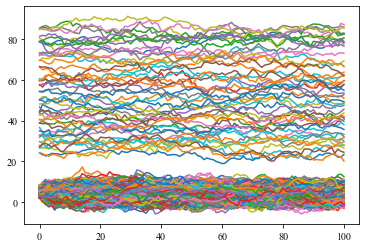

In [3]:
dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation='cube')
non_stationary_data_ARCH = du.create_non_stationary_data('ARol', dh.data)
non_stationary_data_ARCH.to_csv(create_datafile_name('ARol', True, 'cube', False))

100%|██████████| 738/738 [01:52<00:00,  6.58it/s]


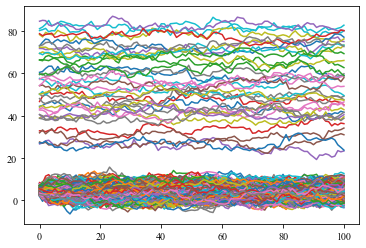

In [4]:
dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation='cube', distinguishable=True)
non_stationary_data_ARCH_dist = du.create_non_stationary_data('ARol', dh.data, distinguishable=True)
non_stationary_data_ARCH_dist.to_csv(create_datafile_name('ARol', True, 'cube', True))

## GARCH
Create non-stationary data using the GARCH model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = n_{t} * \sqrt{ 0.8 + (0.0001 * x_{t-1}^2) + (0.8 * n_{t-1}^2)} + mean_{<component,failure>}
\end{align}

where $n$ is white noise in form of a normal distribution.

100%|██████████| 915/915 [02:29<00:00,  6.10it/s]


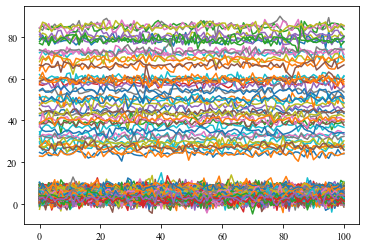

In [5]:
dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation='cube')
non_stationary_data_GARCH = du.create_non_stationary_data('GARCH', dh.data)
non_stationary_data_GARCH.to_csv(create_datafile_name('GARCH', True, 'cube', False))

## Ttest

In [12]:
dh = DataHandler(data_generation='ARol', transformation='cube')
result = du.execute_ttest(dh.data)
print(len(result[result['pvalue']<0.05]), 'of the ', len(result.index) ,' <component, failure> combination pairs are statistical significant')

33 of the  914  <component, failure> combination pairs are statistical significant


In [7]:
dh = DataHandler(data_generation='GARCH', transformation='cube')
result = du.execute_ttest(dh.data)
print(len(result[result['pvalue']<0.05]), 'of the ', len(result.index) ,' <component, failure> combination pairs are statistical significant')

33 of the  914  <component, failure> combination pairs are statistical significant
